# Pytesseract | Function Parameters

This notebook covers some of the function paramters for pytesseract.

Some of the paramters we will cover - directly from the [documentation](https://github.com/madmaze/pytesseract/blob/master/README.rst):

* **image** Object or String - either PIL Image, NumPy array or file path of the image to be processed by Tesseract. If you pass object instead of file path, pytesseract will implicitly convert the image to RGB mode.
* **lang** String - Tesseract language code string. Defaults to eng if not specified! Example for multiple languages: lang='eng+fra'
* **config** String - Any additional custom configuration flags that are not available via the pytesseract function. For example: config='--psm 6'
* **nice** Integer - modifies the processor priority for the Tesseract run. Not supported on Windows. Nice adjusts the niceness of unix-like processes.
* **output_type** Class attribute - specifies the type of the output, defaults to string. For the full list of all supported types, please check the definition of pytesseract.Output class.
* **timeout** Integer or Float - duration in seconds for the OCR processing, after which, pytesseract will terminate and raise RuntimeError.
* **pandas_config** Dict - only for the Output.DATAFRAME type. Dictionary with custom arguments for pandas.read_csv. Allows you to customize the output of image_to_data.

In [2]:
from PIL import Image
import cv2
import pytesseract

## image

The **image** parameter can be passed as a PIL (Pillow) Image, NumPy array, or a string representation of the file path to the image.

The NumPy array feature is particularly useful if you are working with [OpenCV](https://opencv.org/), as the output type of OpenCV's ```imread()``` is a NumPy array. Another thing to note about OpenCV is that, by default, the image will be read as BRG, while pytesseract processes RBG. From the documentation, pytesseract does try to implicitly convert the image to RGB mode, but you can avoid any doubts by reading in the OpenCV image, then converting it:

```python
im = cv2.imread(path)                     # reads an image in the BGR format
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # BGR -> RGB
```

If you're wondering which method to use to read images - it really depends on your use case. 

OpenCV is primarily focused on computer vision and provides a wide range of algorithms and tools for complex vision tasks, while Pillow is more focused on basic image processing and manipulation. So pick the one that best suits your needs at the time.

### Image format support
```python
SUPPORTED_FORMATS = {
    'JPEG',
    'JPEG2000',
    'PNG',
    'PBM',
    'PGM',
    'PPM',
    'TIFF',
    'BMP',
    'GIF',
    'WEBP',
}
```

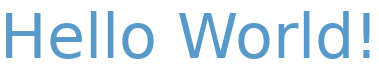

In [48]:
path = '../../../../binder-datasets/ocr/helloworld/hello_world_english.png'
im_pil = Image.open(path)
# display the Pillow compatible image (all are the same).
display(im_pil)

### Extracting via file path:

In [49]:
print(pytesseract.image_to_string(path))

Hello World!




### Extracting via Pillow:

In [50]:
im_pil = Image.open(path)
print(pytesseract.image_to_string(im_pil))

Hello World!




### Extracting via OpenCV:

In [51]:
im_cv = cv2.imread(path)
print(pytesseract.image_to_string(im_cv))

Hello World!




## lang

The **lang** parameter refers to the Tesseract language code and by default, it assumes english (```lang='eng'```). Here is the [complete list of languages supported in different versions of Tesseract](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html)

The lang parameter can accept multiple languages too using the ```+``` delimiter. For example, if your image has both English and French you can pass ```lang='eng+fra'```

If you are unsure of which languages your machine supports, you can print out the supported languages using pytesseract's ```get_languages```.

In [22]:
print(pytesseract.get_languages(config='.'))

['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'sin', 'slk', 'slv', 'snd', 'spa', 'spa_old', 'sqi', 'srp', 'srp_latn', 'sun', 'swa', 'swe', 'syr', 'tam', 'tat', 'tel', 'tgk', 'tha', 'tir', 'ton', 'tur', 'uig', 'ukr', 'urd', 'uzb', 'uzb_cyrl', 'vie', 'yid', 'yor']


Let's try extracting text from an image with two languages.

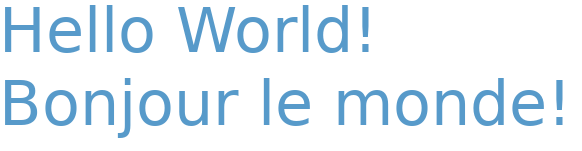

In [19]:
path = '../../../../binder-datasets/ocr/helloworld/hello_world_english_french.png'
im = Image.open(path)
display(im)

In [20]:
print(pytesseract.image_to_string(path, lang='eng+fra'))

Hello World!
Bonjour le monde!




## config

The **config** parameter refers to any additional custom configuration flags not supported directly in pytesseract functions.

These flags can refer to page segmentation modes (PSMs), OCR engine modes (OEMs), and configuration variables.

Page segmentation mode in Tesseract refers to the process of dividing an image containing text into individual text segments or regions. By specifying the desired page segmentation mode, you can instruct Tesseract on how to analyze the image and extract the text accurately. Experimentation with different modes may be necessary to achieve the best results for your specific use case.
```sh
tesseract --help-psm
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
```

The OCR engine mode in Tesseract determines the underlying recognition algorithms and models used for text extraction. It's important to choose the appropriate mode based on the specific requirements of your OCR application, such as the language, document type, and desired accuracy.
```sh
tesseract --help-oem
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.
```

There are over 600+ configuration variables (```-c``` flag). You can find them via:
```sh
tesseract --print-parameters
```
Here is a list in a handy table:
[List of all Tesseract configuration variables](https://gist.github.com/dhorvay/bf2708f45bf5a433933fbac7585a2f84)

Let's try a configuration where we deny any special characters using the ```-c tessedit_char_whitelist``` configuration variable. 
Tesseract does not support regex for this unfortunately, so we need pass it all lower and upper case english characters:
```txt
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
```

We also need to ensure it can read spaces, so put a space at the front as an argument (putting at the end will not work).

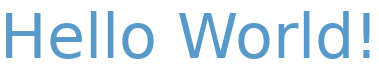

In [23]:
path = '../../../../binder-datasets/ocr/helloworld/hello_world_english.png'
im = Image.open(path)
display(im)

In [44]:
allowlist = ' abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
print(pytesseract.image_to_string(im, config='-c tessedit_char_whitelist=' + allowlist))

Hello World!




## nice

The **nice** command refers to Unix systems niceness. Niceness means that processes have a number to determine their priority for the CPU. A high number means the process is nice and has a lower priority for the CPU and a low or negative number means the process is not very nice and it wants to get as much of the CPU as possible. The nice value range is -20 to +19 where -20 is highest, 0 default and +19 is lowest.

I usually keep this at the default (0). There may be very specific use cases where you need this value, but I have not come across them.

## output_type

The output_type comes in a few flavors, with the default being ```string```:
```python
    BYTES = 'bytes'
    DATAFRAME = 'data.frame'
    DICT = 'dict'
    STRING = 'string'
```

### dict

The ```dict``` type returns in key-value pairs. It is particularly useful when determining things such as orientation.

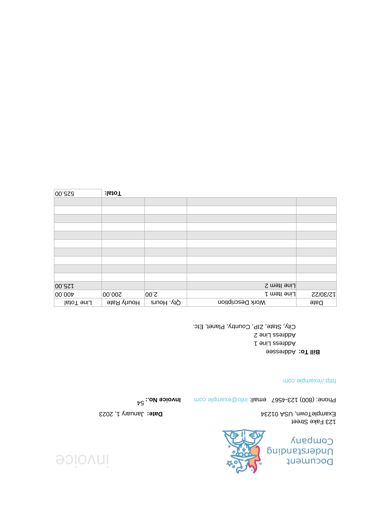

In [70]:
path = '../../../../binder-datasets/ocr/images/invoice_rotated.png'
im = Image.open(path)
display(im.resize(int(0.3*s) for s in im.size))

In [94]:
osd = pytesseract.image_to_osd(im, output_type='dict')
print(osd)
orientation = osd['orientation']
rotate = osd['rotate']
print(f'The image orientation is: {orientation} degrees. To fix - rotate by {rotate} degrees')

{'page_num': 0, 'orientation': 180, 'rotate': 180, 'orientation_conf': 12.51, 'script': 'Latin', 'script_conf': 5.09}
The image orientation is: 180 degrees. To fix - rotate by 180 degrees


## data.frame

The dataframe output is compatiable with the [pandas library](https://pandas.pydata.org/), and can print tables nicely. For example, the tables produced by ```image_to_data```.

In [93]:
im_fixed = im.copy()
im_fixed = im_fixed.rotate(rotate) # since we know orientation is off
df = pytesseract.image_to_data(im_fixed, output_type='data.frame')
df.head(15)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1241,1754,-1,NaN
1,2,1,1,0,0,0,117,731,3,365,-1,NaN
2,3,1,1,1,0,0,117,731,3,365,-1,NaN
3,4,1,1,1,1,0,117,731,3,365,-1,NaN
4,5,1,1,1,1,1,117,731,3,365,95,
5,2,1,2,0,0,0,130,203,219,94,-1,NaN
6,3,1,2,1,0,0,130,203,219,94,-1,NaN
7,4,1,2,1,1,0,131,203,154,22,-1,NaN
8,5,1,2,1,1,1,131,203,154,22,96,Document
9,4,1,2,1,2,0,131,236,218,28,-1,NaN


## pandas_config

On the topic of dataframes, we can customize the output to meet our needs. It follows [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv) and is passed as a ```dict```

The below example is a use case of just generating a dataframe with filled text and the page number the text is found on.

In [84]:
pandas_config = {'usecols': ['page_num', 'text'], 'na_values': [' ']}
df = pytesseract.image_to_data(im_fixed, output_type='data.frame', pandas_config=pandas_config).dropna()
df.head(15)

,page_num,text
8,1,Document
10,1,Understanding
12,1,Company
20,1,123
21,1,Fake
22,1,Street
24,1,"ExampleTown,"
25,1,USA
26,1,01234
30,1,Phone:


## timeout

While this is not required for batch processing, it may be a good idea to add handling to terminate Tesseract if processing is taking too long. Let's try two scenarios, one where we timeout after 1 second and one where we wait 30 seconds to timeout. In this case, 1 second is not enough time to process both images.

In [86]:
timeout=1
try:
    print(pytesseract.image_to_string(im_fixed, timeout=timeout))
except RuntimeError as timeout_error:
    print('Not enough time to extract text!')
    pass

Not enough time to extract text!


In [87]:
timeout=10
try:
    print(pytesseract.image_to_string(im_fixed, timeout=timeout))
except RuntimeError as timeout_error:
    print('Not enough time to extract text!')
    pass

 

Document
Understanding
Company

 

123 Fake Street
ExampleTown, USA 01234

Phone: (800) 123-4567 email: info@example.com

http://example.com

Bill To: Addressee

Address Line 1
Address Line 2
City, State, ZIP, Country, Planet, Etc.

Date: January 1, 2023

Invoice No.: 4

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Date Work Description Qty. Hours | Hourly Rate Line Total
12/30/22 Line Item 1 2.00 200.00 400.00
Line Item 2 125.00)
Total: 525.00

 

 


